## 2. Data Understanding

The data used in this project was obtained from the [Zillow housing data](https://www.zillow.com/research/data/). Our aim is to investigate the data in an attempt to get a deeper understanding of it. 



#### 2.1 Data Description

##### Importing the necessary libaries

In [91]:
# For data manipulation 
import pandas as pd
# For data analysis
import numpy as np
#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# Modelling libraries
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima
import pmdarima as pm #a library to help with auto_arima
import itertools

# Metrics Libraries
from sklearn.metrics import mean_absolute_percentage_error


##### Loading the dataset

In [3]:
data = pd.read_csv("zillow_data.csv")

##### Displaying First Rows

In [4]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


##### Displaying last five rows

In [5]:
data.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


The number of columns(272) in the last and first five rows is the same implying consistency in our dataset

In [6]:
# Checking the shape of dataset
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 14723
Number of columns: 272


The dataset has 14723 rows and 272 columns. 

In [7]:
# Checking for Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [8]:
# Checking Columns
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [9]:
# Description of the columns
columns = {'Columns': ['RegionID','RegionName','City','State','Metro','County Name','Size Rank','Date Columns (265 Columns)'],
'Description':['Unique region identifier','Names of the Regions (Zipcodes)','City names for the regions',
               'Names of the states','Names of metropolitan areas','Names of counties','Rank of Zipcodes by urbanization',
              'Median house prices across the years']}
pd.DataFrame(columns)

,Columns,Description
0,RegionID,Unique region identifier
1,RegionName,Names of the Regions (Zipcodes)
2,City,City names for the regions
3,State,Names of the states
4,Metro,Names of metropolitan areas
5,County Name,Names of counties
6,Size Rank,Rank of Zipcodes by urbanization
7,Date Columns (265 Columns),Median house prices across the years


In [10]:
# Summary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,14723.0,81075.010052,31934.118525,58196.0,67174.5,78007.0,90920.5,753844.0
RegionName,14723.0,48222.348706,29359.325439,1001.0,22101.5,46106.0,75205.5,99901.0
SizeRank,14723.0,7362.000000,4250.308342,1.0,3681.5,7362.0,11042.5,14723.0
1996-04,13684.0,118299.123063,86002.509608,11300.0,68800.0,99500.0,143200.0,3676700.0
1996-05,13684.0,118419.044139,86155.673905,11500.0,68900.0,99500.0,143300.0,3704200.0
...,...,...,...,...,...,...,...,...
2017-12,14723.0,281095.320247,367045.388033,14300.0,129900.0,193400.0,313400.0,18307100.0
2018-01,14723.0,282657.060382,369572.741938,14100.0,130600.0,194100.0,315100.0,18365900.0
2018-02,14723.0,284368.688447,371773.905107,13900.0,131050.0,195000.0,316850.0,18530400.0
2018-03,14723.0,286511.376757,372461.234695,13800.0,131950.0,196700.0,318850.0,18337700.0


#### 2.2 Data Quality from the data description
* The dataset has 14723 rows and 272 columns. 
* The columns have both categorical(4) and numerical data(268)
* There are many columns because it is in a wide fromat; the last 265 columns describe the dates of the housing data. 



## 3. Data Preparation



Inorder to enhance the efficiency of our model, the data has to be inspected and cleaned to align with our objectives. 
This is to ensure that we do not generate any misleading information from the analysis. This includes Checking for the validity, consistency, completeness and uniformity. 

#### 3.1 Data Cleaning

#### 3.1.1 Completeness

*  Checking and Handling for missing values


In [11]:
# Check for missing values 
print(f'The data has {data.isna().sum().sum()} missing values')

The data has 157934 missing values


In [12]:
print(f'The following columns contain these missing values {data.isna().sum().sort_values(ascending = False)}')

The following columns contain these missing values Metro      1043
1997-04    1039
1996-08    1039
1997-06    1039
1997-05    1039
           ... 
2015-09       0
2015-10       0
2015-11       0
2015-12       0
2018-04       0
Length: 272, dtype: int64


In [13]:
per_missing_vals = (data.isna().sum())*100/len(data)
per_missing_vals.sort_values(ascending=False)

Metro      7.084154
1997-04    7.056986
1996-08    7.056986
1997-06    7.056986
1997-05    7.056986
             ...   
2015-09    0.000000
2015-10    0.000000
2015-11    0.000000
2015-12    0.000000
2018-04    0.000000
Length: 272, dtype: float64

In [14]:
# Handling the missing values
## Fill the `metro` column with the word "missing"
data['Metro'].fillna('missing', inplace=True)

In [15]:
missing_values = data.isna().sum().sort_values(ascending=False)
percent = missing_values*100/len(data)
percent.sort_values(ascending=False)
percent

1997-04    7.056986
1996-08    7.056986
1997-06    7.056986
1997-05    7.056986
1997-03    7.056986
             ...   
2015-08    0.000000
2015-09    0.000000
2015-10    0.000000
2015-11    0.000000
2018-04    0.000000
Length: 272, dtype: float64

In [16]:
## Handling the date columns' missing values
data.interpolate(inplace=True)

In [17]:
#Check for the missing values again
data.isna().sum().value_counts()

0    272
dtype: int64

#### 3.1.2 Validity
* Checking for duplicated values 
* Checking for Outliers in the dataset


In [18]:
# Checking for duplicated values  
data.duplicated().sum()


0

There are no duplicated values in the dataset

We  do not check for outliers in the data, as their presence helps improve the accuracy of the model since in real life there are houses that are priced highly above and below the average. 

#### 3.1.3 Uniformity
* Checking if the column names are uniform 
* Exploring the columns more
* Checking if the data types are relevant to the column description


In [19]:
# Cheking the column names again 
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [20]:
# Checking the data type of the RegionName column 
data.dtypes['RegionName']

dtype('int64')

In [21]:
# Renaming the RegionName column to Zipcode because the column's data is in numerical form
data.rename(columns = {'RegionName': "Zipcode"}, inplace=True)

In [22]:
# Changing the data type of the Zipcode column to categorical  
data.Zipcode = data.Zipcode.astype('string')

In [23]:
# Checking for the unique values in the Zipcode column
data.Zipcode.nunique()


14723

#### Data Construction

Here we will  derive new attributes from the data that will be helpful in answering our research questions.

In [24]:

# calculating and creating a new column -ROI

data['ROI'] = (data['2018-04']/ data['1996-04'])-1



#calculating std to be used to find CV
data["std"] = data.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
data["mean"] = data.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV

data["CV"] = data['std']/data["mean"]

# dropping std and mean as they are not necessary for analysis

data.drop(["std", "mean"], inplace=True, axis=1)

In [25]:
data.columns

Index(['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
       '2018-03', '2018-04', 'ROI', 'CV'],
      dtype='object', length=274)

#### Convert data to Time Series

In [26]:
# Create a copy of the dataset to convert into long view while preserving df as a wide view for EDA
new_data = data.copy()

In [27]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank','ROI','CV'], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [28]:
# Loading the melted dataset

new_data = melt_df(new_data)


In [29]:
# First five rows of the melted dataset

new_data.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,Date,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,1996-04-01,77300.0


In [30]:
# Bottom five rows of the melted dataset

new_data.tail()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,Date,value
3901590,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,1.212474,0.232707,2018-04-01,209300.0
3901591,59107,3293,Woodstock,NH,Claremont,Grafton,14720,1.435814,0.303073,2018-04-01,225800.0
3901592,75672,40404,Berea,KY,Richmond,Madison,14721,1.336252,0.182705,2018-04-01,133400.0
3901593,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,2.476714,0.282105,2018-04-01,664400.0
3901594,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,1.024943,0.310044,2018-04-01,357200.0


In [31]:
# Number of rows and columns

print('Number of rows:',new_data.shape[0])
print('Number of columns:',new_data.shape[1])

Number of rows: 3901595
Number of columns: 11


In [32]:
# Numerical Columns
print(f"Numerical Columns: {new_data.select_dtypes(include='int').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {new_data.select_dtypes(include='object').columns}")

Numerical Columns: Index(['RegionID', 'SizeRank'], dtype='object')

Categorical Columns: Index(['City', 'State', 'Metro', 'CountyName'], dtype='object')


In [33]:
# Summary Statistics
new_data.describe()

,RegionID,SizeRank,ROI,CV,value
count,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06
mean,8.107501e+04,7.362000e+03,1.308045e+00,2.373166e-01,2.060636e+05
std,3.193304e+04,4.250165e+03,1.490562e+00,9.595088e-02,2.368017e+05
min,5.819600e+04,1.000000e+00,-8.509374e-01,4.127471e-02,1.130000e+04
25%,6.717400e+04,3.681000e+03,7.398374e-01,1.682299e-01,9.770000e+04
50%,7.800700e+04,7.362000e+03,1.113095e+00,2.281251e-01,1.469000e+05
75%,9.092100e+04,1.104300e+04,1.602582e+00,2.880063e-01,2.354000e+05
max,7.538440e+05,1.472300e+04,1.019626e+02,1.303920e+00,1.931490e+07


##### Data Indexing 
While working with time series data in Python, having dates (or datetimes) in the index can be very helpful, especially if they are of DatetimeIndex type.

In [34]:
## Making the date column into the index

new_data.set_index('Date',inplace = True)


In [35]:
# Checking to confirm if the index column of our new dataframe is Date column 
if isinstance(new_data.index, pd.DatetimeIndex):
    new_data.index.name == 'Date'
    print("Index column is date!")
else:
    print('Index column is not Date')

Index column is date!


In [36]:
# Inspecting Index column 
new_data.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=3901595, freq=None)

The output above shows that our dataset clearly fulfills the indexing requirements. Look at the last line:

dtype='datetime64[ns]',... length=3901595,...'

dtype=datetime[ns] field confirms that the index is made of timestamp objects.
length=3901595 shows the total number of entries in our time series data.


#### Exploratory Data Analysis

 Exploration will be done on the data to determine:

- Does Urbanization Affect Median House Prices?

- Which cities fetch the highest median house prices?

- What top 5 Zipcodes have the highest ROI?

- Which zipcodes have high price volatility?



#### Time Series EDA

This analysis will answer the question: 

What is the trend of median houseprices over the years?
 


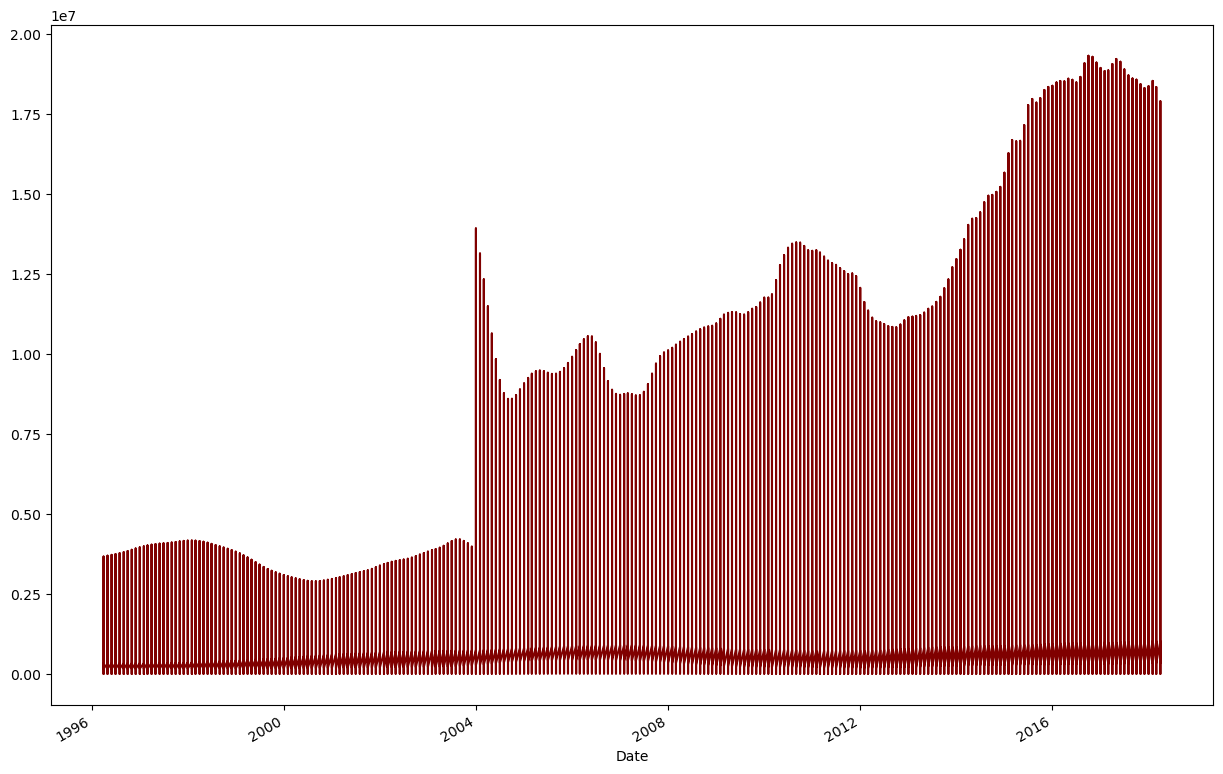

In [37]:
new_data.value.plot(figsize=(15,10),color = 'maroon');

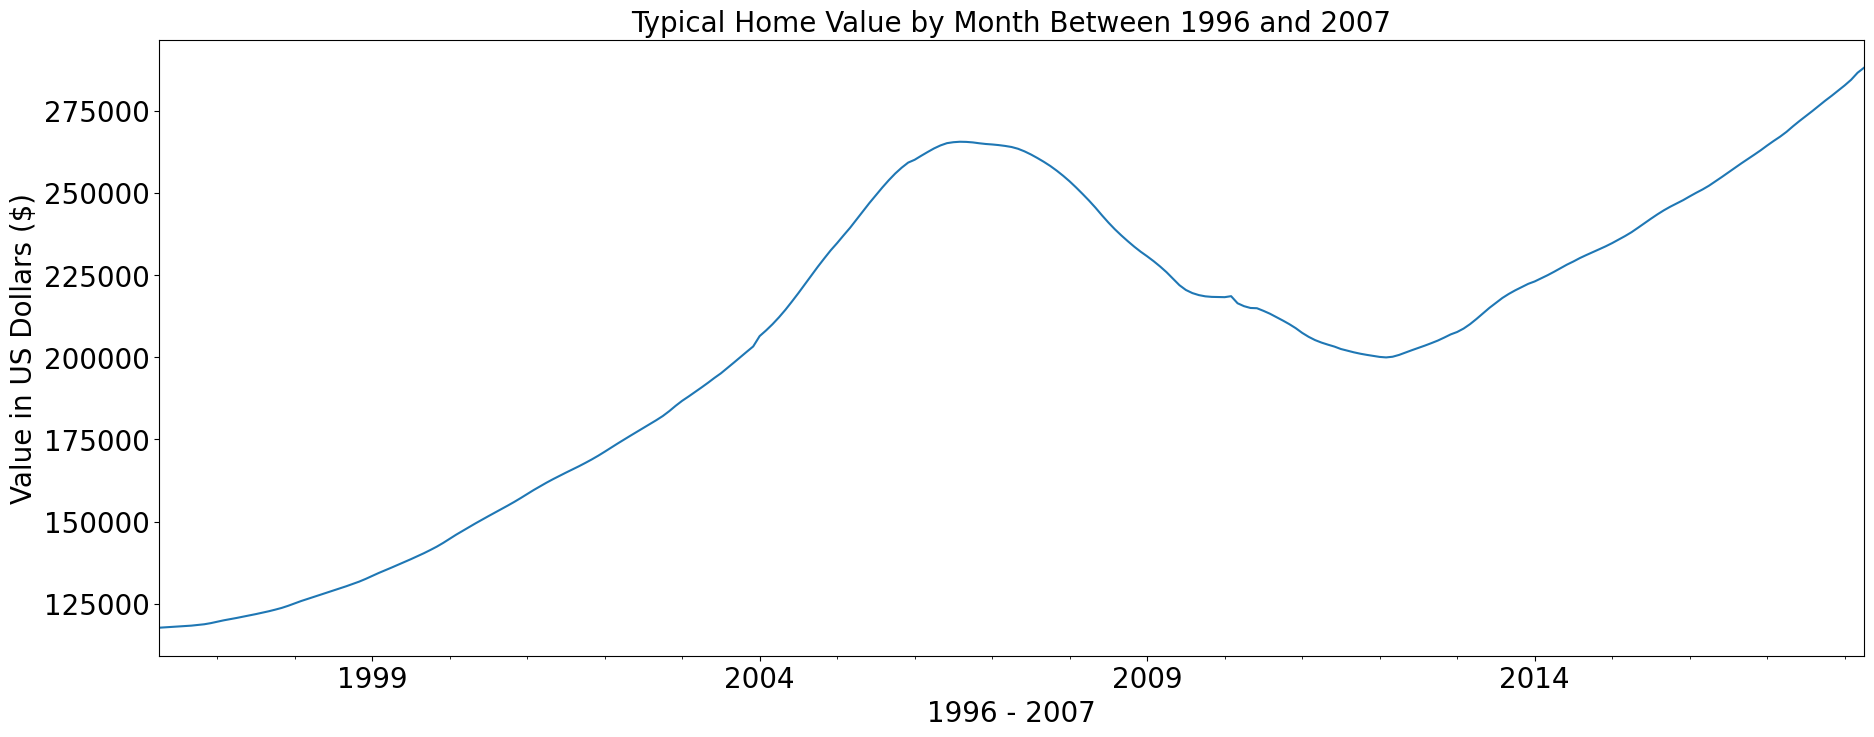

In [38]:
monthly_data = new_data.resample('MS').mean()['value']
# Draw a line plot using the new data
monthly_data.plot(figsize = (22,8))

plt.title('Typical Home Value by Month Between 1996 and 2007',fontsize = 20)
plt.ylabel('Value in US Dollars ($)',fontsize = 20)
plt.xlabel ('1996 - 2007',fontsize = 20)

plt.yticks(fontsize = 20)
plt.xticks (fontsize = 20)

plt.show()

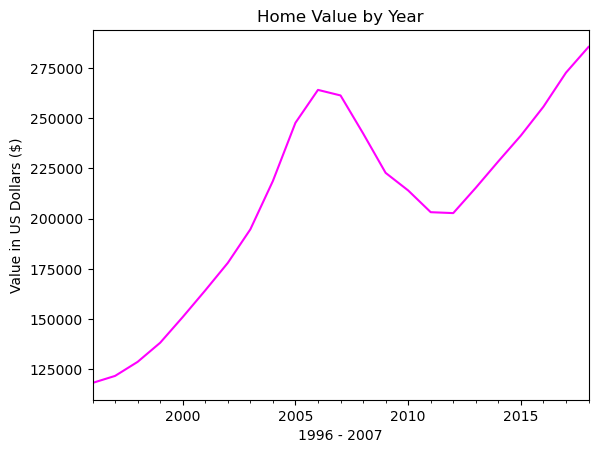

In [39]:
# Annual 
yearly_data =  new_data['value'].resample(rule='A').mean()
yearly_data.plot.line(color='magenta',)

plt.title('Home Value by Year')
plt.ylabel('Value in US Dollars ($)')
plt.xlabel ('1996 - 2007')


plt.show()

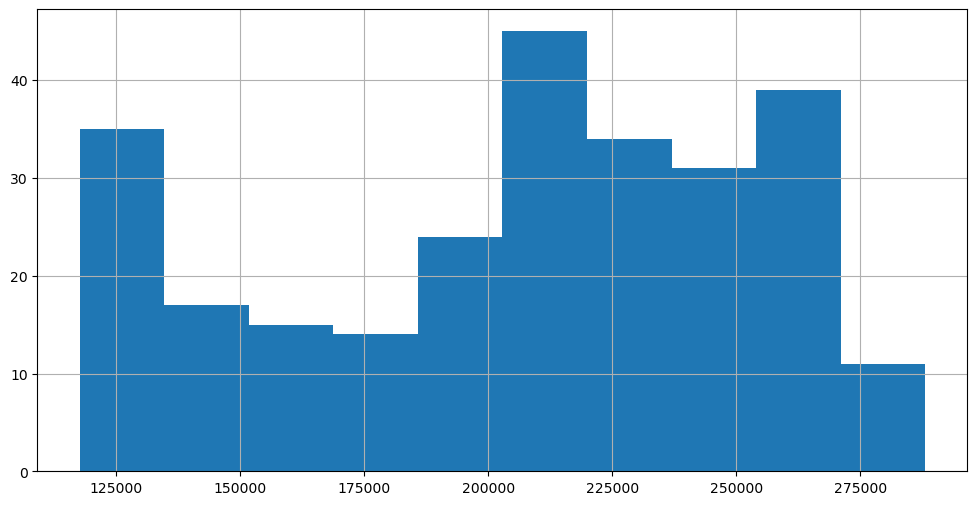

In [40]:
# Plot a histogram of the dataset
monthly_data.hist(figsize = (12,6))
plt.show()

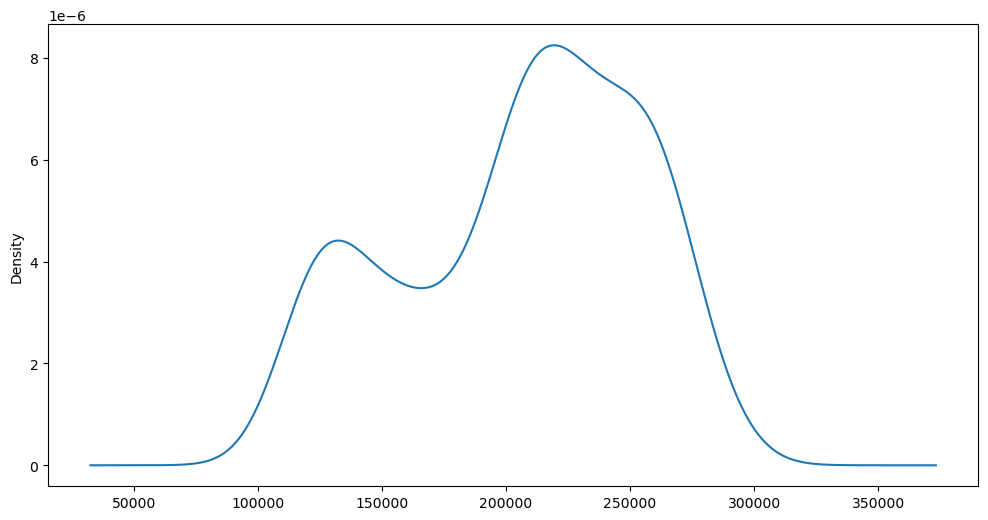

In [41]:
# Plot a density plot for temperature dataset
monthly_data.plot(kind='kde', figsize = (12,6))
plt.show()

#### Heatmap for both Series

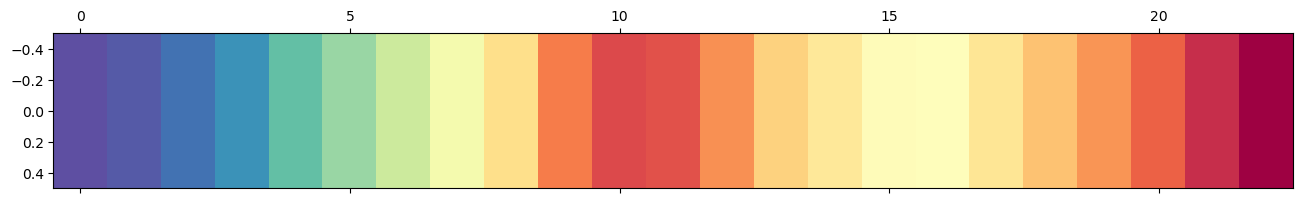

In [42]:
# Transpose the yearly group DataFrame
year_matrix = new_data['value'].resample(rule='A').mean().to_frame().T

# Draw a heatmap with matshow()
plt.matshow( year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

#### Feature Engineering



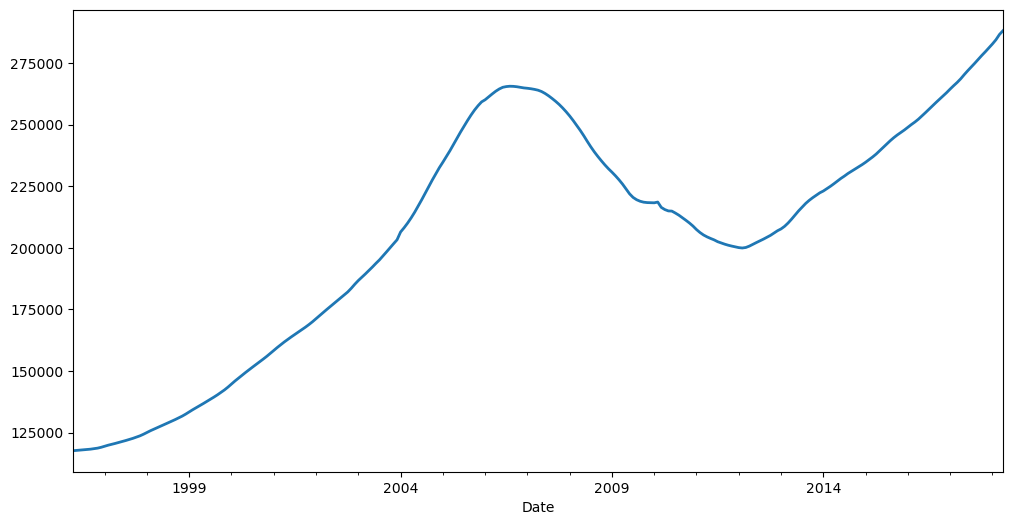

In [43]:
# Plot the time series data
monthly_data.plot(figsize=(12,6), linewidth=2, fontsize=10);

From the graph, there seems to be an increasing trend in data. However,let's reconfirm this using both rolling statistics and the Dickey-Fuller test.


#### Stationarity Test

In [44]:
# create a stationarity function 
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=6, center=False).mean()
    roll_std = TS.rolling(window=6, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None


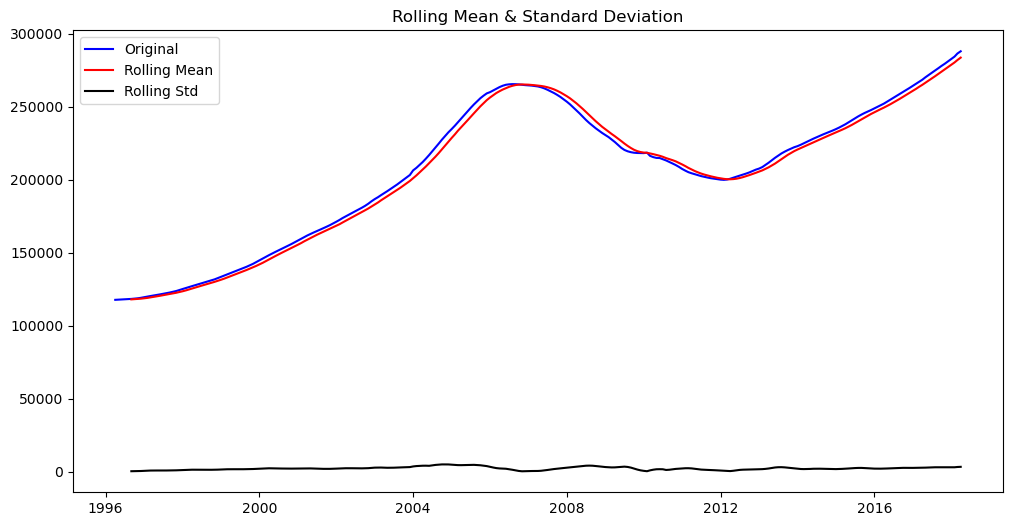

Results of Dickey-Fuller Test: 

Test Statistic                  -1.914667
p-value                          0.325193
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [45]:
stationarity_check(monthly_data)

Though the variation in standard deviation is small, the mean is increasing with time and thus, this is not a stationary series.The pvalue is greater than 0.05 hence we fail to reject the null hypothesis that the series is non-stationary. All the tests show that our series is not stationary.

#### Time Series Decomposition

Given that our series is not stationary,let us decompose our series to determine whether we have any trend,seasonality or residuals in the series.

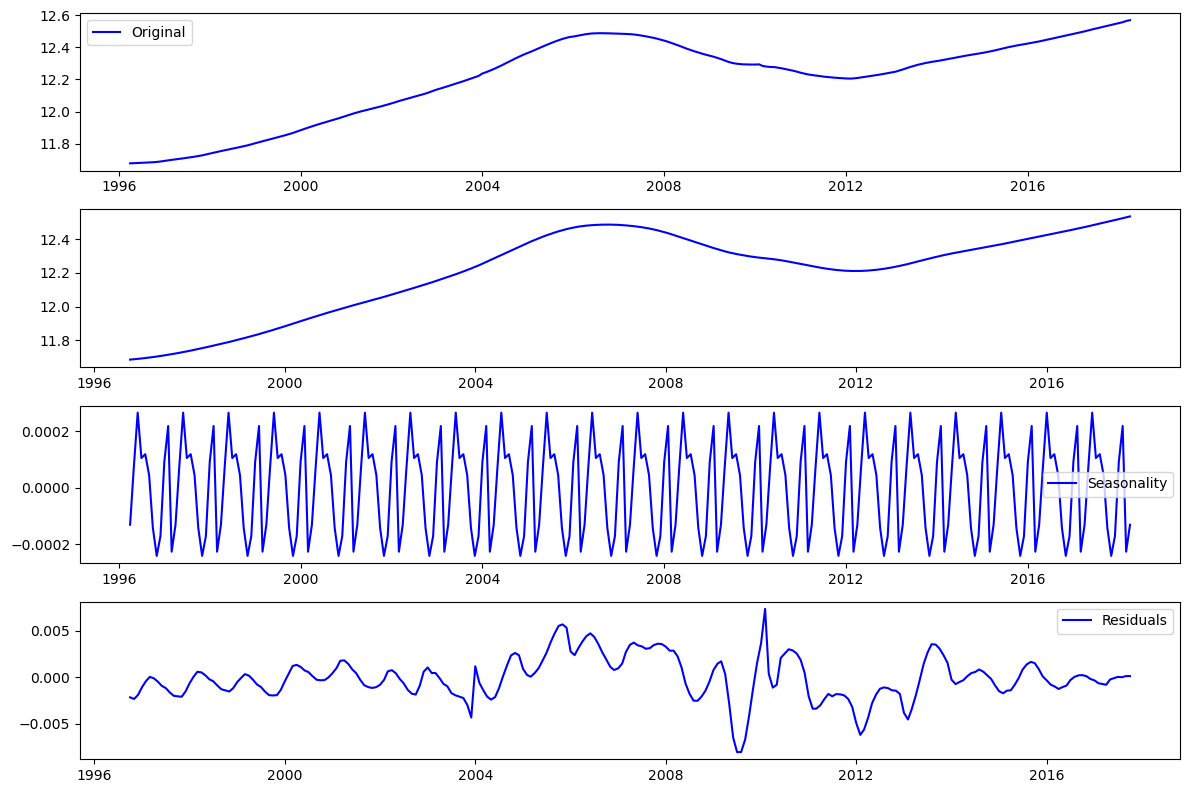

In [46]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(monthly_data))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(monthly_data), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

This makes it easier to identify a changing mean or variation in our data. From the decomposition the plot clearly shows an upward trend in our series with minimal seasonality.We will need to detrend our data for the purposes of modelling.

#### Detrending the Series

In [47]:
data_diff = monthly_data.diff(periods=24).dropna()
data_diff.head(10)


Date
1998-04-01     9394.335394
1998-05-01     9917.679821
1998-06-01    10441.734022
1998-07-01    10964.776201
1998-08-01    11481.274197
1998-09-01    11987.726686
1998-10-01    12486.283366
1998-11-01    12979.012430
1998-12-01    13461.261292
1999-01-01    13930.890444
Freq: MS, Name: value, dtype: float64

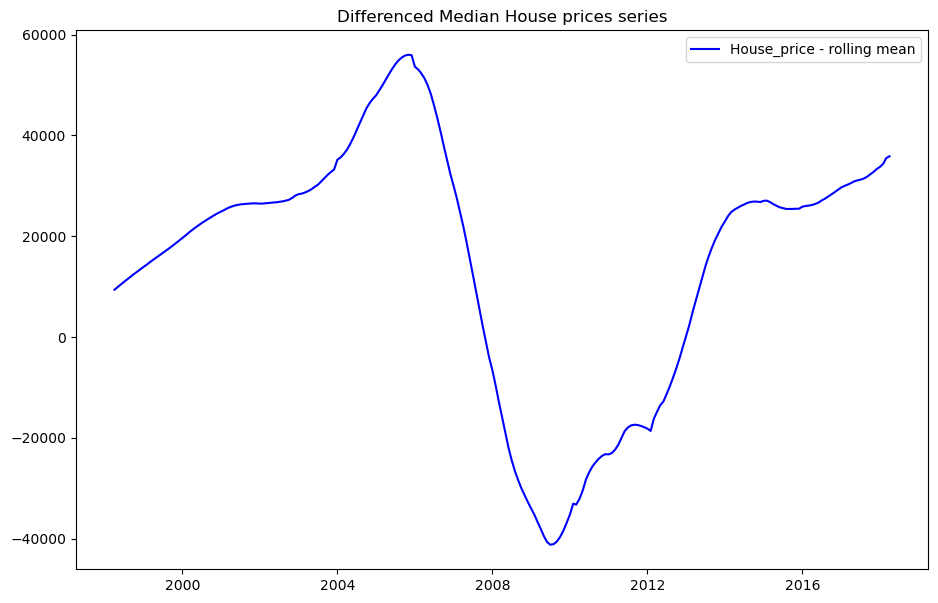

In [48]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='House_price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced Median House prices series')
plt.show(block=False)

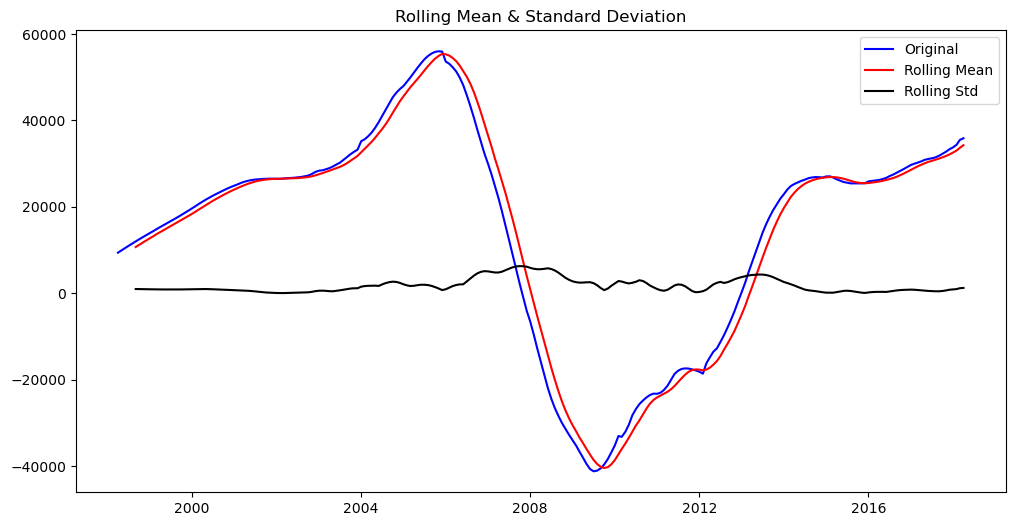

Results of Dickey-Fuller Test: 

Test Statistic                  -3.109067
p-value                          0.025889
#Lags Used                       2.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


In [49]:
stationarity_check(data_diff)

The p-value is now below 0.05 therefore we reject the null hypothesis that the series is non-stationary. 

#### Correlation of the Differenced Data

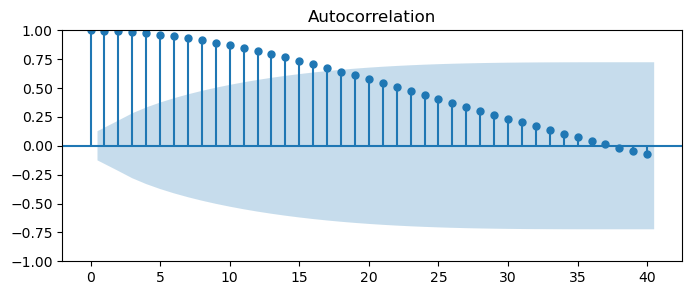

In [52]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff,ax=ax, lags= 40);

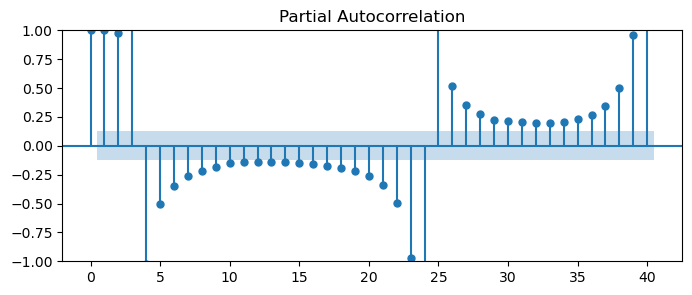

In [53]:
# Plot the PACF

from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff,ax=ax, lags=40);

#### Time Series Modelling

#### Baseline Model

We will construct an MA model as our baseline model then increase its complexity with more complex models. 

In [64]:
# Fit an ARMA model
mod_ma = ARIMA(data_diff, order=(0,0,1))
res_ma = mod_ma.fit()

# Print out summary information on the fit
print(res_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  241
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2620.418
Date:                Tue, 29 Nov 2022   AIC                           5246.837
Time:                        22:42:54   BIC                           5257.291
Sample:                    04-01-1998   HQIC                          5251.049
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.484e+04   2058.572      7.210      0.000    1.08e+04    1.89e+04
ma.L1          1.0000      0.132      7.562      0.000       0.741       1.259
sigma2      1.652e+08    8.9e-07   1.86e+14      0.0

In [63]:
# Import ARIMA

from statsmodels.tsa.arima.model import ARIMA

# Fit an AR model
mod_ar = ARIMA(data_diff, order=(1,0,0))
res_ar = mod_ar.fit()

# Print out summary information on the fit
print(res_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  241
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2073.427
Date:                Tue, 29 Nov 2022   AIC                           4152.854
Time:                        22:41:42   BIC                           4163.308
Sample:                    04-01-1998   HQIC                          4157.065
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.484e+04   3.22e+04      0.461      0.645   -4.82e+04    7.79e+04
ar.L1          0.9977      0.003    368.889      0.000       0.992       1.003
sigma2      1.704e+06   4073.492    418.312      0.0

In [58]:
# Fit an ARMA model
mod_arma = ARIMA(data_diff, order=(1,0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  241
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1966.920
Date:                Tue, 29 Nov 2022   AIC                           3941.840
Time:                        22:23:26   BIC                           3955.780
Sample:                    04-01-1998   HQIC                          3947.456
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.484e+04   3.39e+04      0.437      0.662   -5.17e+04    8.14e+04
ar.L1          0.9973      0.003    323.820      0.000       0.991       1.003
ma.L1          0.7497      0.038     19.599      0.0

In [62]:
mod_arima = ARIMA(data_diff, order=(1,1,1))
res_arima = mod_arima.fit()

# Print out summary information on the fit
print(res_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  241
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1786.068
Date:                Tue, 29 Nov 2022   AIC                           3578.136
Time:                        22:36:36   BIC                           3588.578
Sample:                    04-01-1998   HQIC                          3582.343
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9388      0.010     98.014      0.000       0.920       0.958
ma.L1         -0.2384      0.042     -5.641      0.000      -0.321      -0.156
sigma2      1.487e+05   4248.325     34.996      0.0

In [68]:
#using auto_arima- it does a random search for the best pdq,PDQS  
sarima_model = pm.auto_arima(monthly_data, 
                             m=12,
                             seasonal=True,
                             start_p=0,
                             start_q=0,
                             start_P=0,
                             start_Q=0,
                             max_order=6, 
                             test='adf',
                             error_action='warn',  
                             suppress_warnings=True,
                              stepwise=True,
                              trace=False)
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  265
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1851.209
Date:                Tue, 29 Nov 2022   AIC                           3712.419
Time:                        23:12:55   BIC                           3730.317
Sample:                    04-01-1996   HQIC                          3719.610
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     97.0645    100.271      0.968      0.333     -99.462     293.591
ar.L1          1.9897      0.008    234.922      0.000       1.973       2.006
ar.L2         -0.9901      0.009   -114.892      0.000      -1.007      -0.973
ma.L1         -0.2281      0.028     -8.089      0.000      -0.283      -0.173
sigma2      6.483e+04      1.556   4.17e+04      0.000    6.48e+04    6.48e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             12641.35
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               4.67   Skew:                            -2.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.18e+19. Standard errors may be unstable.
"""

In [69]:
# Define the p, d and q parameters to take any value between 0 and 2

p = d = q = range(0,2)

# Generate all different combinations of p, d , q and s
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [72]:
ans = []
for comb in pdq:    
    for combs in pdqs:
        try:
            model = sm.tsa.statespace.SARIMAX(data_diff,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            output = model.fit()
            ans.append([comb, combs, output.aic])
           
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16551D+01    |proj g|=  1.27187D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.272D-07   1.166D+01
  F =   11.655128394192152     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23618D+01    |proj g|=  6.96933D-02

At iterate    5    f=  9.66921D+00    |proj g|=  6.51111D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     16      1     0     0   3.353D-05   9.669D+00
  F =   9.6692130170672925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04577D+01    |proj g|=  1.88493D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   1.870D-05   1.046D+01
  F =   10.457712647724343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.5


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.17161D+01    |proj g|=  1.90250D+00

At iterate   15    f=  1.01559D+01    |proj g|=  3.68518D-02

At iterate   20    f=  1.01552D+01    |proj g|=  5.24819D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     34      1     0     0   3.746D-05   1.016D+01
  F =   10.155176473851212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71269D+00    |proj g|=  7.63052D-06

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.59282D+00    |proj g|=  2.52192D-01

At iterate   10    f=  9.52005D+00    |proj g|=  4.58559D-02

At iterate   15    f=  9.51824D+00    |proj g|=  2.92314D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     35      1     0     0   2.923D-05   9.518D+00
  F =   9.5182435341233553     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20893D+01    |proj g|=  4.21399D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.13409D+01    |proj g|=  1.90752D-01

At iterate   10    f=  1.13380D+01    |proj g|=  2.11276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     31      1     0     0   1.782D-05   1.134D+01
  F =   11.337959574913654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04855D+01    |proj g|=  5.05373D-01

At iterate    5    f=  1.00461D+01    |proj g|=  4.53111D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.15671D+01    |proj g|=  6.00427D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     22      1     0     0   7.556D-05   1.157D+01
  F =   11.566935015156167     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14718D+01    |proj g|=  3.98572D-01

At iterate    5    f=  1.06826D+01    |proj g|=  1.73591D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63072D+01    |proj g|=  3.91775D-01

At iterate    5    f=  1.27702D+01    |proj g|=  3.06956D+00

At iterate   10    f=  1.05812D+01    |proj g|=  3.26667D-02

At iterate   15    f=  1.05755D+01    |proj g|=  1.83615D-02

At iterate   20    f=  1.05714D+01    |proj g|=  4.37539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     44      1     0     0   3.108D-05   1.057D+01
  F =   10.571225543321960     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  9.55519D+00    |proj g|=  1.19670D-02

At iterate   10    f=  9.55518D+00    |proj g|=  1.47479D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     25      1     0     0   5.064D-05   9.555D+00
  F =   9.5551753674796949     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29852D+01    |proj g|=  5.81639D-01


 This problem is unconstrained.



At iterate    5    f=  1.07997D+01    |proj g|=  8.51483D-01

At iterate   10    f=  1.02799D+01    |proj g|=  6.38802D-01

At iterate   15    f=  1.01721D+01    |proj g|=  5.24717D-02

At iterate   20    f=  1.01712D+01    |proj g|=  3.05755D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     38      1     0     0   3.058D-05   1.017D+01
  F =   10.171244444045925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     30      1     0     0   1.893D-06   7.736D+00
  F =   7.7364324024191840     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03941D+00    |proj g|=  4.86226D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  7.55526D+00    |proj g|=  5.41707D-03

At iterate   15    f=  7.55362D+00    |proj g|=  5.09554D-02

At iterate   20    f=  7.51563D+00    |proj g|=  6.33321D-02

At iterate   25    f=  7.51313D+00    |proj g|=  7.80886D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     25     31      1     0     0   7.809D-07   7.513D+00
  F =   7.5131270659359508     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.86646D+00    |proj g|=  1.64740D-01

At iterate    5    f=  7.78023D+00    |proj g|=  2.24103D-03

At iterate   10    f=  7.78020D+00    |proj g|=  5.55548D-03

At iterate   15    f=  7.77719D+00    |proj g|=  8.28265D-02

At iterate   20    f=  7.71742D+00    |proj g|=  8.06837D-02

At iterate   25    f=  7.69943D+00    |proj g|=  2.16975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     33      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.52619D+00    |proj g|=  3.68453D-03

At iterate   15    f=  7.52558D+00    |proj g|=  4.49338D-02

At iterate   20    f=  7.49837D+00    |proj g|=  2.19056D-01

At iterate   25    f=  7.47733D+00    |proj g|=  1.05389D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   1.044D-06   7.477D+00
  F =   7.4773259848892799     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18595D+00    |proj g|=  2.64941D-02

At iterate    5    f=  8.18577D+00    |proj g|=  2.27908D-03

At iterate   10    f=  8.18539D+00    |proj g|=  3.77858D-02

At iterate   15    f=  8.12715D+00    |proj g|=  7.16331D-01

At iterate   20    f=  8.05028D+00    |proj g|=  5.09901D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     22     25      1     0     0   3.903D-06   8.050D+00
  F =   8.0502791442321939     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     24      1     0     0   5.163D-07   7.684D+00
  F =   7.6838223119295632     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34850D+00    |proj g|=  8.67549D-02

At iterate    5    f=  7.33771D+00    |proj g|=  6.39153D-04

At iterate   10    f=  7.33753D+00    |proj g|=  5.78330D-03

At iterate   15    f=  7.30913D+00    |proj g|=  3.35662D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.69838D+00    |proj g|=  2.84074D-02

At iterate   10    f=  7.69768D+00    |proj g|=  5.47105D-04

At iterate   15    f=  7.69734D+00    |proj g|=  1.11479D-02

At iterate   20    f=  7.65960D+00    |proj g|=  1.47552D-01

At iterate   25    f=  7.38488D+00    |proj g|=  8.60828D-02

At iterate   30    f=  7.37119D+00    |proj g|=  4.59913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     42      1     0     0   1.790D-05   7.371D+00
  F =   7.3711920544960190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.41945D+00    |proj g|=  3.27366D-04

At iterate   10    f=  7.41943D+00    |proj g|=  8.16651D-03

At iterate   15    f=  7.41584D+00    |proj g|=  1.14504D-01

At iterate   20    f=  7.36131D+00    |proj g|=  9.49640D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.014D-05   7.360D+00
  F =   7.3596337513017662     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.31007D+00    |proj g|=  4.45939D-02

At iterate   15    f=  7.30905D+00    |proj g|=  7.72527D-04

At iterate   20    f=  7.30866D+00    |proj g|=  1.47451D-02

At iterate   25    f=  7.27497D+00    |proj g|=  1.29049D-01

At iterate   30    f=  7.19161D+00    |proj g|=  8.30845D-02

At iterate   35    f=  7.18488D+00    |proj g|=  2.49146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     46      1     0     0   7.687D-06   7.185D+00
  F =   7.1848765050765904     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.84012D+00    |proj g|=  1.16346D+01

At iterate   10    f=  7.96494D+00    |proj g|=  3.98735D+00

At iterate   15    f=  7.89187D+00    |proj g|=  6.67379D-03

At iterate   20    f=  7.89186D+00    |proj g|=  1.39810D-02

At iterate   25    f=  7.89159D+00    |proj g|=  1.77482D-01

At iterate   30    f=  7.86073D+00    |proj g|=  2.57155D+00

At iterate   35    f=  7.76968D+00    |proj g|=  4.37430D-01

At iterate   40    f=  7.76905D+00    |proj g|=  2.76833D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     65      1     0     0   2.768D-04   7.769D+00
  F =   7.76904511197

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     15      1     0     0   6.973D-04   8.071D+00
  F =   8.0710496595666541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88542D+00    |proj g|=  1.34428D-01

At iterate    5    f=  7.60021D+00    |proj g|=  6.52967D-01

At iterate   10    f=  7.57951D+00    |proj g|=  4.26348D-04

At iterate   15    f=  7.57947D+00    |proj g|=  6.96342D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.48917D+00    |proj g|=  1.33448D-01

At iterate   10    f=  8.91137D+00    |proj g|=  9.61826D+00

At iterate   15    f=  7.88185D+00    |proj g|=  2.12780D-01

At iterate   20    f=  7.87793D+00    |proj g|=  5.22081D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     33      1     0     0   4.091D-04   7.878D+00
  F =   7.8779335026076938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.64282D+00    |proj g|=  3.36255D+00

At iterate   10    f=  7.54029D+00    |proj g|=  2.19734D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     29      1     0     0   2.223D-04   7.540D+00
  F =   7.5398395120158712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.21891D+00    |proj g|=  2.46436D-02

At iterate    5    f=  8.21873D+00    |proj g|=  4.42506D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.73299D+00    |proj g|=  9.27454D-03

At iterate   15    f=  7.73297D+00    |proj g|=  5.72827D-03

At iterate   20    f=  7.73285D+00    |proj g|=  9.15217D-02

At iterate   25    f=  7.71762D+00    |proj g|=  1.11087D+00

At iterate   30    f=  7.51137D+00    |proj g|=  1.77091D+00

At iterate   35    f=  7.40821D+00    |proj g|=  1.21963D-01

At iterate   40    f=  7.40791D+00    |proj g|=  7.78146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     56      1     1     0   7.781D-05   7.408D+00
  F =   7.4079106711235063     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate   20    f=  7.72346D+00    |proj g|=  2.04230D-01

At iterate   25    f=  7.71853D+00    |proj g|=  2.28245D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   2.351D-06   7.719D+00
  F =   7.7185286217121778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80768D+00    |proj g|=  1.34842D-01


 This problem is unconstrained.



At iterate    5    f=  7.44500D+00    |proj g|=  2.38709D+00

At iterate   10    f=  7.37271D+00    |proj g|=  8.86572D-02

At iterate   15    f=  7.37255D+00    |proj g|=  3.52901D-04

At iterate   20    f=  7.37249D+00    |proj g|=  2.40078D-02

At iterate   25    f=  7.36542D+00    |proj g|=  4.06283D-01

At iterate   30    f=  7.29334D+00    |proj g|=  9.31418D-02

At iterate   35    f=  7.29061D+00    |proj g|=  1.96579D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     54      1     0     0   5.690D-05   7.291D+00
  F =   7.2906005157596780     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  7.80580D+00    |proj g|=  1.98002D-01

At iterate   20    f=  7.77514D+00    |proj g|=  2.38547D+00

At iterate   25    f=  7.62950D+00    |proj g|=  1.61159D-01

At iterate   30    f=  7.61425D+00    |proj g|=  2.25217D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     73      2     0     0   2.605D-04   7.614D+00
  F =   7.6142421303839773     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.61792D+00    |proj g|=  2.06869D-01

At iterate    5    f=  9.25532D+00    |proj g|=  2.01858D+00

At iterate   10    f=  7.94998D+00    |proj g|=  2.14748D+00

At iterate   15    f=  7.73898D+00    |proj g|=  6.11401D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  7.41892D+00    |proj g|=  2.78460D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   3.284D-04   7.419D+00
  F =   7.4188980811921743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.73153D+00    |proj g|=  1.44707D-01


 This problem is unconstrained.



At iterate    5    f=  7.57883D+00    |proj g|=  3.01285D+00

At iterate   10    f=  7.36386D+00    |proj g|=  2.01514D-01

At iterate   15    f=  7.34337D+00    |proj g|=  2.47378D-02

At iterate   20    f=  7.34333D+00    |proj g|=  3.49030D-03

At iterate   25    f=  7.34271D+00    |proj g|=  7.65388D-02

At iterate   30    f=  7.28930D+00    |proj g|=  5.68378D-01

At iterate   35    f=  7.22683D+00    |proj g|=  1.39921D-01

At iterate   40    f=  7.21711D+00    |proj g|=  2.05347D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     59      1     0     0   7.897D-06   7.217D+00
  F =   7.21711150698

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  6.97560D+00    |proj g|=  2.23224D-04

At iterate   10    f=  6.97553D+00    |proj g|=  7.26148D-03

At iterate   15    f=  6.97377D+00    |proj g|=  2.74714D-02

At iterate   20    f=  6.97222D+00    |proj g|=  1.58728D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     26      1     0     0   1.587D-05   6.972D+00
  F =   6.9722211347927443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.96954D+00    |proj g|=  1.58513D-01

At iterate    5    f=  6.77347D+00    |proj g|=  1.71662D-02

At iterate   10    f=  6.77343D+00    |proj g|=  6.16667D-03

At iterate   15    f=  6.77241D+00    |proj g|=  9.42667D-02

At iterate   20    f=  6.72898D+00    |proj g|=  1.73795D-01

At iterate   25    f=  6.72133D+00    |proj g|=  7.76805D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.92633D+00    |proj g|=  1.29231D-03

At iterate   15    f=  6.92632D+00    |proj g|=  3.18652D-03

At iterate   20    f=  6.92533D+00    |proj g|=  4.78131D-02

At iterate   25    f=  6.91210D+00    |proj g|=  1.49302D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     39      1     0     0   5.969D-06   6.912D+00
  F =   6.9119890867182514     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.91916D+00    |proj g|=  3.38249D-05

At iterate   10    f=  6.91915D+00    |proj g|=  7.95076D-03

At iterate   15    f=  6.91906D+00    |proj g|=  1.27215D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     23      1     0     0   1.351D-06   6.919D+00
  F =   6.9190586227668485     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98819D+00    |proj g|=  3.49956D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.91844D+00    |proj g|=  2.84673D-04

At iterate   15    f=  6.91839D+00    |proj g|=  8.50423D-03

At iterate   20    f=  6.91700D+00    |proj g|=  4.87780D-02

At iterate   25    f=  6.91331D+00    |proj g|=  2.65564D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     30      1     0     0   3.573D-06   6.913D+00
  F =   6.9133102485451978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.74975D+00    |proj g|=  7.40795D-01

At iterate   10    f=  6.71953D+00    |proj g|=  6.78781D-03

At iterate   15    f=  6.71952D+00    |proj g|=  5.26573D-03

At iterate   20    f=  6.71919D+00    |proj g|=  7.20772D-02

At iterate   25    f=  6.69582D+00    |proj g|=  4.54520D-01

At iterate   30    f=  6.66764D+00    |proj g|=  2.08336D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     42      1     0     0   3.198D-06   6.668D+00
  F =   6.6675949223344828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.94479D+00    |proj g|=  6.22814D-02

At iterate   10    f=  6.87136D+00    |proj g|=  1.16395D-02

At iterate   15    f=  6.87130D+00    |proj g|=  1.19416D-03

At iterate   20    f=  6.87125D+00    |proj g|=  2.40165D-02

At iterate   25    f=  6.86643D+00    |proj g|=  2.27932D-01

At iterate   30    f=  6.85353D+00    |proj g|=  1.19168D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     40      1     0     0   1.982D-06   6.853D+00
  F =   6.8534338443950604     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.89359D+00    |proj g|=  7.12516D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   9.995D-06   6.894D+00
  F =   6.8935916502472674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93173D+00    |proj g|=  3.45564D-01

At iterate    5    f=  6.79158D+00    |proj g|=  7.87748D-01

At iterate   10    f=  6.71738D+00    |proj g|=  9.99868D-02

At iter

In [73]:
ans_df = pd.DataFrame(ans, columns=['pdq','pdqs', 'aic'])
ans_df

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",5619.771886
1,"(0, 0, 0)","(0, 0, 1, 12)",5197.316680
2,"(0, 0, 0)","(0, 1, 0, 12)",5031.069847
3,"(0, 0, 0)","(0, 1, 1, 12)",4664.560674
4,"(0, 0, 0)","(1, 0, 0, 12)",5044.617496
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",3221.780753
60,"(1, 1, 1)","(1, 0, 0, 12)",3373.468042
61,"(1, 1, 1)","(1, 0, 1, 12)",3313.355113
62,"(1, 1, 1)","(1, 1, 0, 12)",3330.711175


In [74]:
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic       3221.780753
Name: 59, dtype: object

In [76]:
my_model2 = sm.tsa.statespace.SARIMAX(data_diff,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = my_model2.fit()

print(results2.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97521D+00    |proj g|=  3.80674D-01


 This problem is unconstrained.



At iterate    5    f=  5.87170D+00    |proj g|=  5.19440D-01

At iterate   10    f=  5.84837D+00    |proj g|=  3.37662D-01

At iterate   15    f=  5.84106D+00    |proj g|=  2.34818D-02

At iterate   20    f=  5.83763D+00    |proj g|=  5.21616D-01

At iterate   25    f=  5.83594D+00    |proj g|=  3.08631D-02

At iterate   30    f=  5.83468D+00    |proj g|=  1.49511D-02

At iterate   35    f=  5.83459D+00    |proj g|=  4.26111D-03

At iterate   40    f=  5.83454D+00    |proj g|=  2.08033D-02

At iterate   45    f=  5.83449D+00    |proj g|=  2.29604D-02

At iterate   50    f=  5.83445D+00    |proj g|=  2.30681D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

#### Model Evaluation and Forecasting

#### Non-Dynamic

In [84]:
from sklearn.metrics import mean_squared_error

In [80]:
pred = results2.get_prediction(start=pd.to_datetime('2010-01-01'), dynamic=False)

pred_ci = pred.conf_int() # this gives us the confidence interval for our forecasts

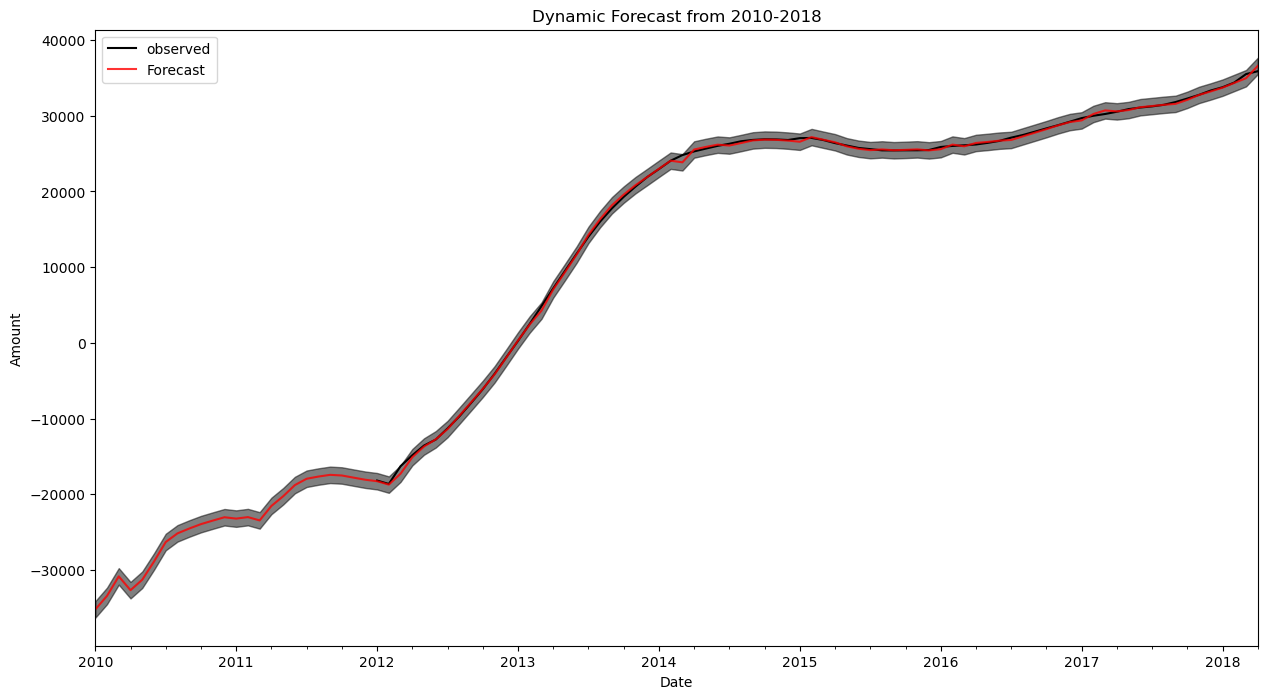

In [82]:
plt.figure(figsize = (15,8))
ax = data_diff['2012':].plot(label='observed',color='black')
pred.predicted_mean.plot(ax=ax, label='Forecast', color='red',alpha=0.8)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.5)

ax.set_title('Dynamic Forecast from 2010-2018')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()

In [94]:
# evaluation

y_forecasted1 = pred.predicted_mean
y_truth1 = data_diff['2010-01-01':]
mean_absolute_percentage_error(y_truth1, y_forecasted1)

0.012820724013374633

#### Dynamic

In [87]:
pred_dynamic = results2.get_prediction(start=pd.to_datetime('2010-01-01'), dynamic=True)
pred_dynamic_ci = pred_dynamic.conf_int()

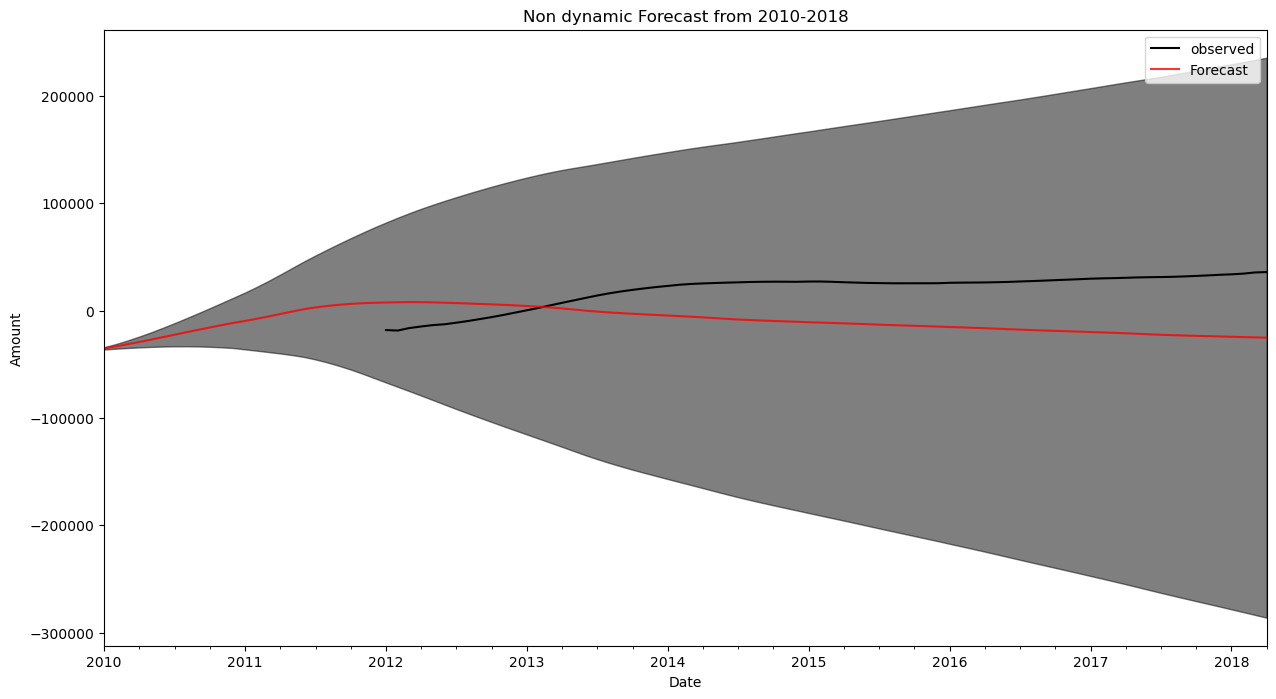

In [88]:
plt.figure(figsize = (15,8))
ax = data_diff['2012':].plot(label='observed',color='black')
pred_dynamic.predicted_mean.plot(ax=ax, label='Forecast', color='red',alpha=0.8)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.5)

ax.set_title('Dynamic Forecast from 2010-2018')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
plt.legend()

plt.show()


In [96]:
# Evaluation
y_forecasted2 = pred_dynamic .predicted_mean
y_truth2 = data_diff['2010-01-01':]
mean_absolute_percentage_error(y_truth2, y_forecasted2)

1.4282981344070993

#### Future Prediction

In [118]:
#prediction 2 years into the future

pred_uc = results2.get_forecast(steps= 24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

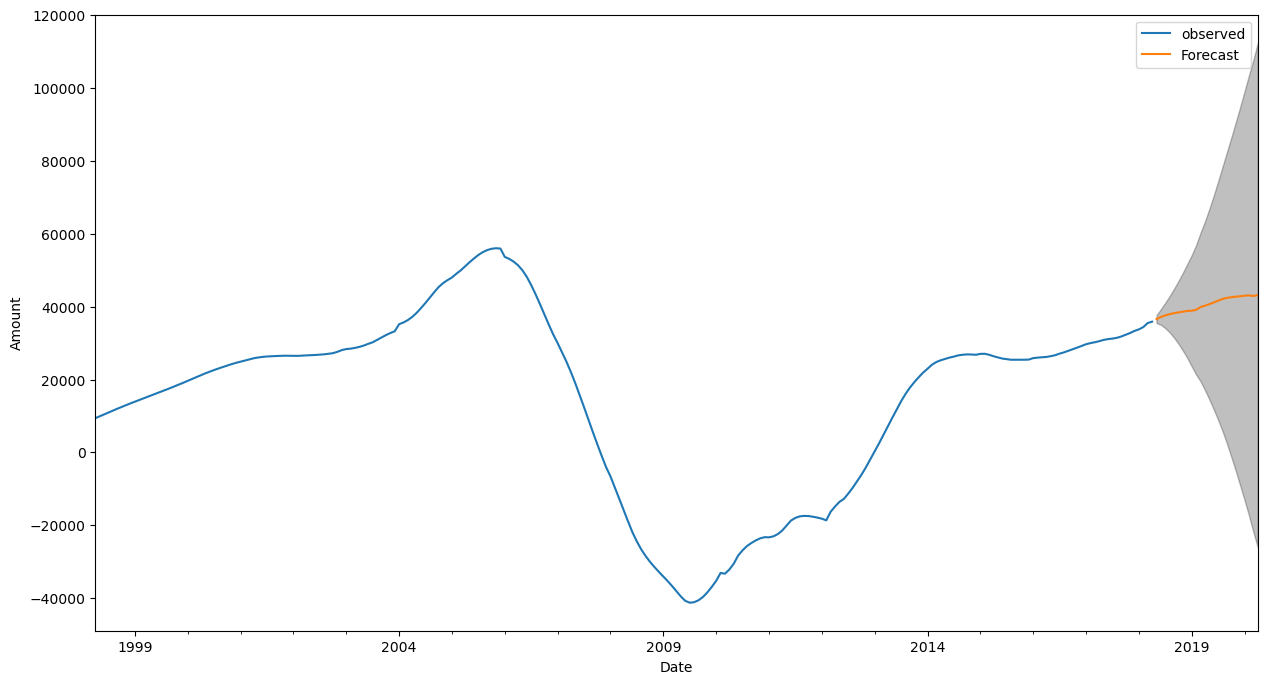

In [119]:
ax =data_diff.plot(label='observed', figsize=(15, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Amount')

plt.legend()
plt.show()


In [120]:
# Long Term Investment

#prediction 20 years into the future

pred_uc = results2.get_forecast(steps= 240)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


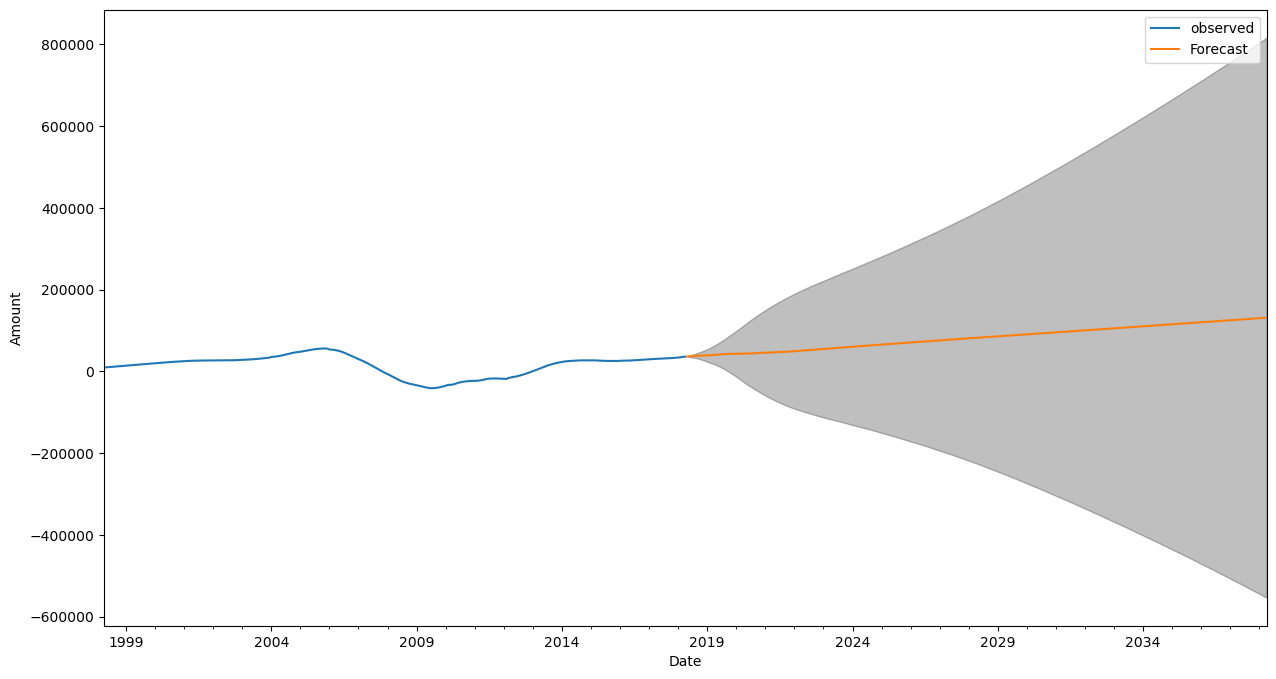

In [122]:
# Visualizing the long term investment

ax =data_diff.plot(label='observed', figsize=(15, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Amount')

plt.legend()
plt.show()
